In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
from PIL import Image
import random
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc, roc_auc_score

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# TensorFlow and Keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.regularizers import l2
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils 

# import keras
from tensorflow.keras.utils import multi_gpu_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from tensorflow.keras import optimizers 

print(tf.__version__)


2.1.0


In [2]:

micro_roc_auc_resnet50_Ph_adam = 0.9393449292660889
micro_roc_auc_resnet50_Ph_sgd = 0.8127504122228424
micro_roc_auc_resnet50_Ph_notpretrained = 0.8675560374136212 

micro_roc_auc = [micro_roc_auc_resnet50_Ph_adam, micro_roc_auc_resnet50_Ph_sgd, micro_roc_auc_resnet50_Ph_notpretrained]
micro_roc_auc_labels = ['micro_roc_auc_resnet50_Ph_adam', 'micro_roc_auc_resnet50_Ph_sgd', 'micro_roc_auc_resnet50_Ph_notpretrained']

In [3]:
#micro_roc_auc_resnet50_adam.savetxt('test.txt', delimiter=',') #SAVE ROC_AUC

In [4]:
micro_roc_auc
micro_roc_auc_labels

['micro_roc_auc_resnet50_Ph_adam',
 'micro_roc_auc_resnet50_Ph_sgd',
 'micro_roc_auc_resnet50_Ph_notpretrained']

In [5]:
micro_roc_auc_resnet50 = []
micro_roc_auc_resnet50 = pd.DataFrame({"model": micro_roc_auc_labels,
                                      "roc_auc(micro) for ResNet50 models": micro_roc_auc})

micro_roc_auc_resnet50

,model,roc_auc(micro) for ResNet50 models
0,micro_roc_auc_resnet50_Ph_adam,0.939345
1,micro_roc_auc_resnet50_Ph_sgd,0.812750
2,micro_roc_auc_resnet50_Ph_notpretrained,0.867556


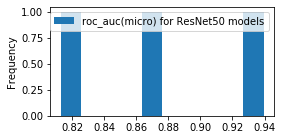

In [6]:
micro_roc_auc_resnet50.plot.hist(figsize=(4, 2))

In [7]:
img_loss_adam = mpimg.imread('/home/jovyan/scratch-shared/Linnea/Join channels differently/ResNet50/Adam/loss_resnet50_Ph__pretrained_adam_lr0.0001_batch32_may14.png')
img_loss_sgd = mpimg.imread('/home/jovyan/scratch-shared/Linnea/Join channels differently/ResNet50/SGD/lr=0.01/loss_resnet50_Ph__pretrained_SGD_lr0.01_batch32_may22.png')
img_loss_notpretrained = mpimg.imread('/home/jovyan/scratch-shared/Linnea/Join channels differently/ResNet50/Not pretrained/loss_resnet50_Ph_adam_lr0.0001_batch32_may14.png')


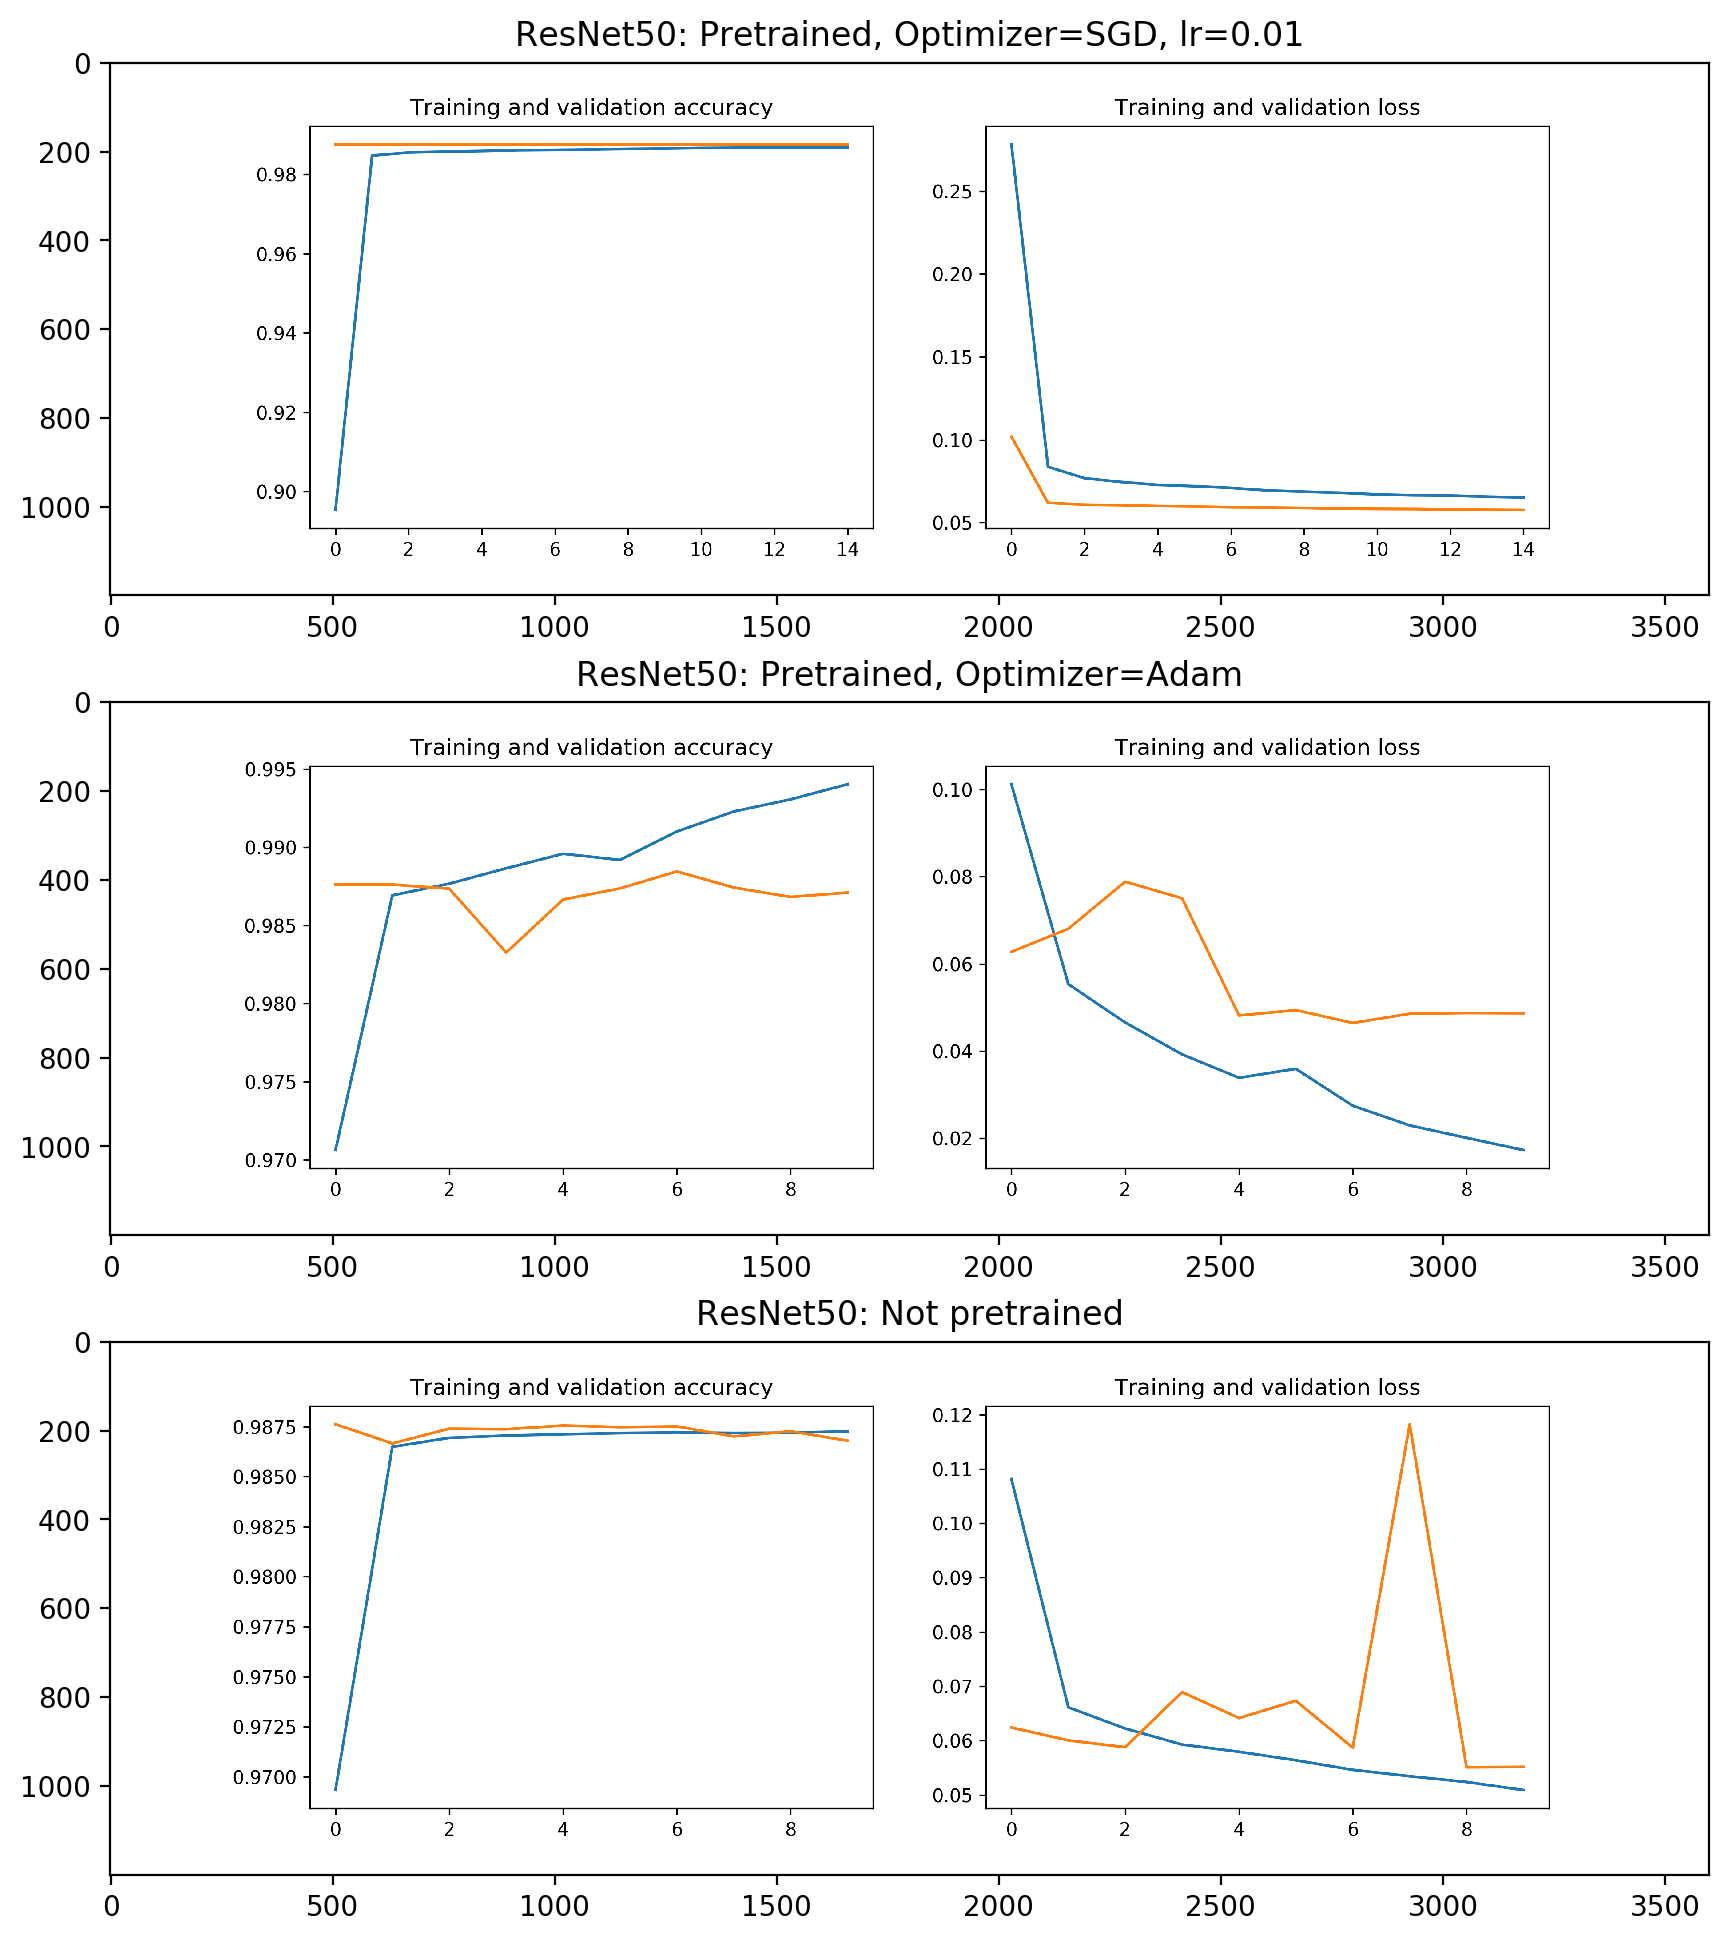

In [8]:
plt.figure(num=3, figsize=(18, 12), dpi=200)

plt.subplot(3,1,1)
plt.title('ResNet50: Pretrained, Optimizer=SGD, lr=0.01')
plt.imshow(img_loss_sgd)
    
plt.subplot(3,1,2)
plt.title('ResNet50: Pretrained, Optimizer=Adam')
plt.imshow(img_loss_adam)


plt.subplot(3,1,3)
plt.title('ResNet50: Not pretrained')
plt.imshow(img_loss_notpretrained)
plt.show()